# Taller 03

## Nombre: Isaac Gonzalez
## Métodos Númericos 

---


- Complete el código

- Compruebe gráficamente la solución de los siguientes ejercicios:

1. (0,1), (1,5), (2,3)

In [3]:
import sympy as sym
from IPython.display import display


# ##################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3

        print(j, a, b, c[j], d)
        splines.append(S)

    splines.reverse()
    return splines


xs = [0,1,2]
ys=[1,5,3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

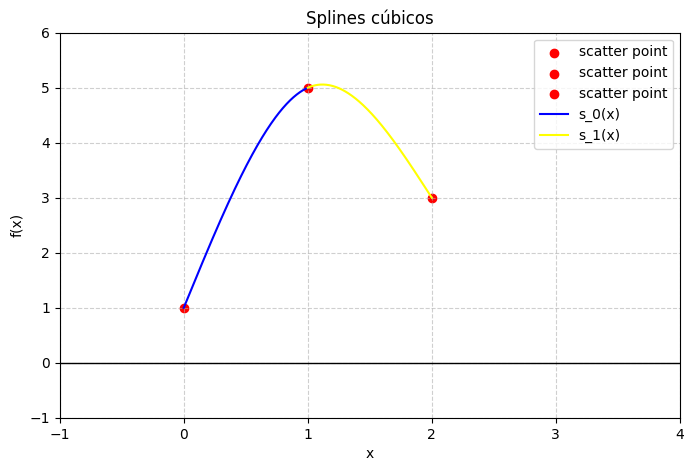

In [9]:
import numpy as np
import matplotlib.pyplot as plt

xs0 = np.linspace(0, 1, 200)
xs1 = np.linspace(1, 2, 200)


def s_0(x):
    return 1  + 5.5*x - 1.5*x**3

def s_1(x):
    return -2+14.5*x - 9*x**2 +1.5*x**3


plt.figure(figsize=(8, 5))
plt.scatter([0.0], [1.0], color='red', label='scatter point')
plt.scatter([1.0], [5.0], color='red', label='scatter point')
plt.scatter([2.0], [3.0], color='red', label='scatter point')
plt.plot(xs0, s_0(xs0), label='s_0(x)', color='blue')
plt.plot(xs1, s_1(xs1), label='s_1(x)', color='yellow')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Splines cúbicos')
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plt.show()

2. (0, -5), (1, -4), (2,3)

In [1]:
import sympy as sym
from IPython.display import display


# ##################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3

        print(j, a, b, c[j], d)
        splines.append(S)

    splines.reverse()
    return splines


xs = [0,1,2]
ys=[-5,-4,3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

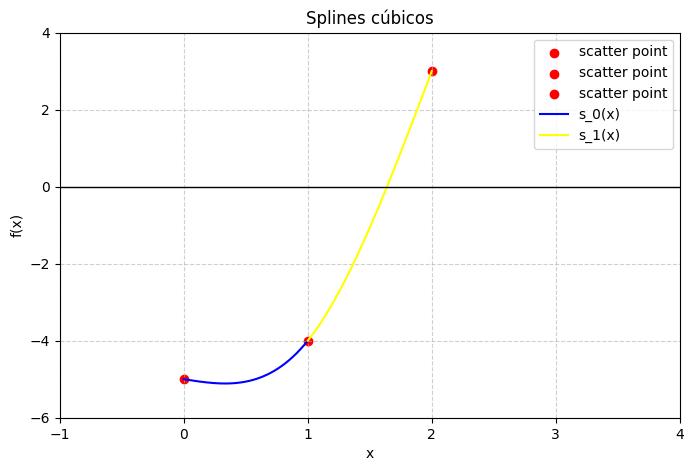

In [19]:
import numpy as np
import matplotlib.pyplot as plt

xs0 = np.linspace(0, 1, 200)
xs1 = np.linspace(1, 2, 200)


def s_0(x):
    return -5 - 0.5*x + 1.5*x**3

def s_1(x):
    return -2-9.5*x + 9*x**2 -1.5*x**3


plt.figure(figsize=(8, 5))
plt.scatter([0.0], [-5.0], color='red', label='scatter point')
plt.scatter([1.0], [-4.0], color='red', label='scatter point')
plt.scatter([2.0], [3.0], color='red', label='scatter point')
plt.plot(xs0, s_0(xs0), label='s_0(x)', color='blue')
plt.plot(xs1, s_1(xs1), label='s_1(x)', color='yellow')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Splines cúbicos')
plt.legend()
plt.xlim(-1, 4)
plt.ylim(-6, 4)
plt.show()

3. (0, -1), (1,1), (2,5), (3,2)

In [20]:
import sympy as sym
from IPython.display import display


# ##################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b*(x - xs[j]) + c[j]*(x - xs[j])**2 + d*(x - xs[j])**3

        print(j, a, b, c[j], d)
        splines.append(S)

    splines.reverse()
    return splines


xs = [0,1,2,3]
ys=[-1,1,5,2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

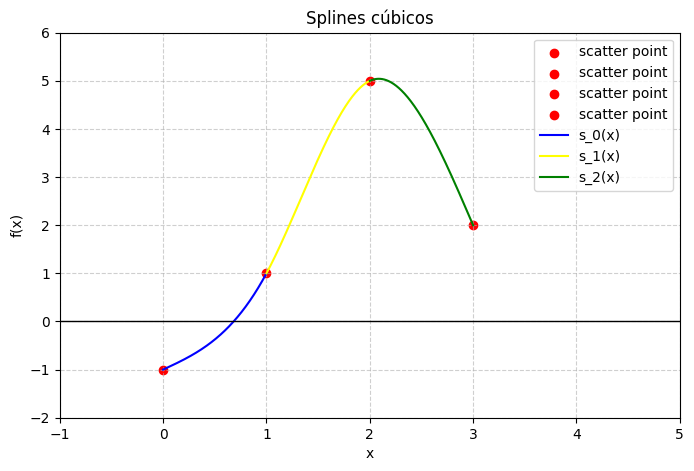

In [29]:
import numpy as np
import matplotlib.pyplot as plt

xs0 = np.linspace(0, 1, 200)
xs1 = np.linspace(1, 2, 200)
xs2 = np.linspace(2, 3, 200)


def s_0(x):
    return -1 + 1*x + 1*x**3

def s_1(x):
    return 3-11*x + 12*x**2 -3*x**3

def s_2(x):
    return -37+49*x -18*x**2 + 2*x**3


plt.figure(figsize=(8, 5))
plt.scatter([0.0], [-1.0], color='red', label='scatter point')
plt.scatter([1.0], [1.0], color='red', label='scatter point')
plt.scatter([2.0], [5.0], color='red', label='scatter point')
plt.scatter([3.0], [2.0], color = 'red', label = 'scatter point')
plt.plot(xs0, s_0(xs0), label='s_0(x)', color='blue')
plt.plot(xs1, s_1(xs1), label='s_1(x)', color='yellow')
plt.plot(xs2, s_2(xs2), label= 's_2(x)', color = 'green')
plt.axhline(0, color='black', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Splines cúbicos')
plt.legend()
plt.xlim(-1, 5)
plt.ylim(-2, 6)
plt.show()

- Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con $B_0=1$
 para todos los valores de $B_1∈R$
.

-  Primeros puntos 

In [2]:
import numpy as np

def spline_cubico_clamped(puntos_x, puntos_y, deriv_ini, deriv_fin):
    n = len(puntos_x) - 1
    h = [puntos_x[i+1] - puntos_x[i] for i in range(n)]

    alpha = [0]*(n+1)
    alpha[0] = 3*((puntos_y[1] - puntos_y[0]) / h[0] - deriv_ini)
    alpha[n] = 3*(deriv_fin - (puntos_y[n] - puntos_y[n-1]) / h[n-1])

    for i in range(1, n):
        alpha[i] = (3/h[i])*(puntos_y[i+1] - puntos_y[i]) - (3/h[i-1])*(puntos_y[i] - puntos_y[i-1])

    L = [0]*(n+1)
    mu = [0]*(n+1)
    Z = [0]*(n+1)

    L[0] = 2*h[0]
    mu[0] = 0.5
    Z[0] = alpha[0] / L[0]

    for i in range(1, n):
        L[i] = 2*(puntos_x[i+1] - puntos_x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / L[i]
        Z[i] = (alpha[i] - h[i-1]*Z[i-1]) / L[i]

    L[n] = h[n-1] * (2 - mu[n-1])
    Z[n] = (alpha[n] - h[n-1]*Z[n-1]) / L[n]

    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n

    c[n] = Z[n]
    for j in range(n-1, -1, -1):
        c[j] = Z[j] - mu[j]*c[j+1]
        b[j] = (puntos_y[j+1] - puntos_y[j]) / h[j] - h[j]*(2*c[j] + c[j+1]) / 3
        d[j] = (c[j+1] - c[j]) / (3*h[j])

    return puntos_y, b, c, d


X = [0, 1, 2]
Y = [1, 5, 3]

FPO = 1
valores_derivada = np.linspace(-30, 30, 20)

for fp_final in valores_derivada:
    print("\n----------------------------------------------")
    print(f">>>  Cálculo del spline con B1 = {fp_final:.4f}")
    print("----------------------------------------------")

    a, b, c, d = spline_cubico_clamped(X, Y, FPO, fp_final)

    for i in range(len(X)-1):
        print(f"S{i}(x) = "
              f"{a[i]:.6f} + "
              f"{b[i]:.6f}(x-{X[i]}) + "
              f"{c[i]:.6f}(x-{X[i]})^2 + "
              f"{d[i]:.6f}(x-{X[i]})^3")



----------------------------------------------
>>>  Cálculo del spline con B1 = -30.0000
----------------------------------------------
S0(x) = 1.000000 + 1.000000(x-0) + 1.250000(x-0)^2 + 1.750000(x-0)^3
S1(x) = 5.000000 + 8.750000(x-1) + 6.500000(x-1)^2 + -17.250000(x-1)^3

----------------------------------------------
>>>  Cálculo del spline con B1 = -26.8421
----------------------------------------------
S0(x) = 1.000000 + 1.000000(x-0) + 2.039474(x-0)^2 + 0.960526(x-0)^3
S1(x) = 5.000000 + 7.960526(x-1) + 4.921053(x-1)^2 + -14.881579(x-1)^3

----------------------------------------------
>>>  Cálculo del spline con B1 = -23.6842
----------------------------------------------
S0(x) = 1.000000 + 1.000000(x-0) + 2.828947(x-0)^2 + 0.171053(x-0)^3
S1(x) = 5.000000 + 7.171053(x-1) + 3.342105(x-1)^2 + -12.513158(x-1)^3

----------------------------------------------
>>>  Cálculo del spline con B1 = -20.5263
----------------------------------------------
S0(x) = 1.000000 + 1.000000(x-0)

- Segundos puntos 

In [3]:
import numpy as np

def spline_cubico_clamped(puntos_x, valores_y, deriv_ini, deriv_fin):
    n = len(puntos_x) - 1
    h = [puntos_x[i+1] - puntos_x[i] for i in range(n)]

    alpha = [0]*(n+1)
    alpha[0] = 3*((valores_y[1] - valores_y[0]) / h[0] - deriv_ini)
    alpha[n] = 3*(deriv_fin - (valores_y[n] - valores_y[n-1]) / h[n-1])

    for i in range(1, n):
        alpha[i] = (3/h[i])*(valores_y[i+1] - valores_y[i]) - (3/h[i-1])*(valores_y[i] - valores_y[i-1])

    L = [0]*(n+1)
    mu = [0]*(n+1)
    Z = [0]*(n+1)

    L[0] = 2*h[0]
    mu[0] = 0.5
    Z[0] = alpha[0] / L[0]

    for i in range(1, n):
        L[i] = 2*(puntos_x[i+1] - puntos_x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / L[i]
        Z[i] = (alpha[i] - h[i-1]*Z[i-1]) / L[i]

    L[n] = h[n-1] * (2 - mu[n-1])
    Z[n] = (alpha[n] - h[n-1]*Z[n-1]) / L[n]

    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n

    c[n] = Z[n]
    for j in range(n-1, -1, -1):
        c[j] = Z[j] - mu[j]*c[j+1]
        b[j] = (valores_y[j+1] - valores_y[j]) / h[j] - h[j]*(2*c[j] + c[j+1]) / 3
        d[j] = (c[j+1] - c[j]) / (3*h[j])

    return valores_y, b, c, d


X = [0, 1, 2]
Y = [-5, -4, 3]

B0 = 1
valores_B1 = np.linspace(-30, 30, 20)

for B1 in valores_B1:
    print("\n----------------------------------------------")
    print(f">>>  Cálculo del spline con B1 = {B1:.4f}")
    print("----------------------------------------------")

    a, b, c, d = spline_cubico_clamped(X, Y, B0, B1)

    for i in range(len(X)-1):
        print(f"S{i}(x) = "
              f"{a[i]:.6f} + "
              f"{b[i]:.6f}(x-{X[i]}) + "
              f"{c[i]:.6f}(x-{X[i]})^2 + "
              f"{d[i]:.6f}(x-{X[i]})^3")



----------------------------------------------
>>>  Cálculo del spline con B1 = -30.0000
----------------------------------------------
S0(x) = -5.000000 + 1.000000(x-0) + -12.250000(x-0)^2 + 12.250000(x-0)^3
S1(x) = -4.000000 + 13.250000(x-1) + 24.500000(x-1)^2 + -30.750000(x-1)^3

----------------------------------------------
>>>  Cálculo del spline con B1 = -26.8421
----------------------------------------------
S0(x) = -5.000000 + 1.000000(x-0) + -11.460526(x-0)^2 + 11.460526(x-0)^3
S1(x) = -4.000000 + 12.460526(x-1) + 22.921053(x-1)^2 + -28.381579(x-1)^3

----------------------------------------------
>>>  Cálculo del spline con B1 = -23.6842
----------------------------------------------
S0(x) = -5.000000 + 1.000000(x-0) + -10.671053(x-0)^2 + 10.671053(x-0)^3
S1(x) = -4.000000 + 11.671053(x-1) + 21.342105(x-1)^2 + -26.013158(x-1)^3

----------------------------------------------
>>>  Cálculo del spline con B1 = -20.5263
----------------------------------------------
S0(x) = -5.

- Tercer Puntos 

In [4]:
import numpy as np

def spline_cubico_clamped(puntos_x, valores_y, deriv_ini, deriv_fin):
    n = len(puntos_x) - 1
    h = [puntos_x[i+1] - puntos_x[i] for i in range(n)]

    alpha = [0]*(n+1)
    alpha[0] = 3*((valores_y[1] - valores_y[0]) / h[0] - deriv_ini)
    alpha[n] = 3*(deriv_fin - (valores_y[n] - valores_y[n-1]) / h[n-1])

    for i in range(1, n):
        alpha[i] = (3/h[i])*(valores_y[i+1] - valores_y[i]) - (3/h[i-1])*(valores_y[i] - valores_y[i-1])

    L = [0]*(n+1)
    mu = [0]*(n+1)
    Z = [0]*(n+1)

    L[0] = 2*h[0]
    mu[0] = 0.5
    Z[0] = alpha[0] / L[0]

    for i in range(1, n):
        L[i] = 2*(puntos_x[i+1] - puntos_x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / L[i]
        Z[i] = (alpha[i] - h[i-1]*Z[i-1]) / L[i]

    L[n] = h[n-1] * (2 - mu[n-1])
    Z[n] = (alpha[n] - h[n-1]*Z[n-1]) / L[n]

    c = [0]*(n+1)
    b = [0]*n
    d = [0]*n

    c[n] = Z[n]
    for j in range(n-1, -1, -1):
        c[j] = Z[j] - mu[j]*c[j+1]
        b[j] = (valores_y[j+1] - valores_y[j]) / h[j] - h[j]*(2*c[j] + c[j+1]) / 3
        d[j] = (c[j+1] - c[j]) / (3*h[j])

    return valores_y, b, c, d


X = [0, 1, 2, 3]
Y = [-1, 1, 5, 2]

B0 = 1
valores_B1 = np.linspace(-30, 30, 20)

for B1 in valores_B1:
    print("\n----------------------------------------------")
    print(f">>>  Cálculo del spline con B1 = {B1:.4f}")
    print("----------------------------------------------")

    a, b, c, d = spline_cubico_clamped(X, Y, B0, B1)

    for i in range(len(X)-1):
        print(f"S{i}(x) = "
              f"{a[i]:.6f} + "
              f"{b[i]:.6f}(x-{X[i]}) + "
              f"{c[i]:.6f}(x-{X[i]})^2 + "
              f"{d[i]:.6f}(x-{X[i]})^3")



----------------------------------------------
>>>  Cálculo del spline con B1 = -30.0000
----------------------------------------------
S0(x) = -1.000000 + 1.000000(x-0) + 1.666667(x-0)^2 + -0.666667(x-0)^3
S1(x) = 1.000000 + 2.333333(x-1) + -0.333333(x-1)^2 + 2.000000(x-1)^3
S2(x) = 5.000000 + 7.666667(x-2) + 5.666667(x-2)^2 + -16.333333(x-2)^3

----------------------------------------------
>>>  Cálculo del spline con B1 = -26.8421
----------------------------------------------
S0(x) = -1.000000 + 1.000000(x-0) + 1.456140(x-0)^2 + -0.456140(x-0)^3
S1(x) = 1.000000 + 2.543860(x-1) + 0.087719(x-1)^2 + 1.368421(x-1)^3
S2(x) = 5.000000 + 6.824561(x-2) + 4.192982(x-2)^2 + -14.017544(x-2)^3

----------------------------------------------
>>>  Cálculo del spline con B1 = -23.6842
----------------------------------------------
S0(x) = -1.000000 + 1.000000(x-0) + 1.245614(x-0)^2 + -0.245614(x-0)^3
S1(x) = 1.000000 + 2.754386(x-1) + 0.508772(x-1)^2 + 0.736842(x-1)^3
S2(x) = 5.000000 + 5.98245